# Importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

# Importar el data set


In [3]:
df = pd.read_csv('/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /AA_MODULOS/Modulo 7_Aprendizaje automatico/Ejercicio no supervisado/Clientes.csv',sep=';')
df.head()

,ID,Sexo,Edad,Ingresos,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

## Análisis inicial de datos

Realizamos el EDA para entender el perfil de los clientes de la compañía. Analizaremos la distribución de edad, 
ingresos y score de compra, así como la proporción por género, lo que nos ayudará a identificar patrones y 
características relevantes para la posterior segmentación.

In [9]:
# 1. Análisis Exploratorio de Datos (EDA)
print("1. ANÁLISIS INICIAL DE LA ESTRUCTURA DE DATOS")
print("-" * 50)

# Verificamos la estructura básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas del dataset para entender su estructura:")
print(df.head())

# Verificamos tipos de datos y valores faltantes
print("\nInformación del dataset (tipos de datos y valores no nulos):")
print(df.info())

print("\n2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO")
print("-" * 50)
print("Estadísticas descriptivas de variables numéricas:")
print(df.describe())

# Justificación: Este primer análisis nos permite:
# 1. Confirmar que tenemos 200 registros con 5 variables
# 2. Identificar si hay valores nulos que necesiten tratamiento
# 3. Verificar los rangos de valores y posibles anomalías
# 4. Entender la distribución de nuestras variables numéricas

1. ANÁLISIS INICIAL DE LA ESTRUCTURA DE DATOS
--------------------------------------------------
Dimensiones del dataset: (200, 5)

Primeras filas del dataset para entender su estructura:
   ID    Sexo  Edad  Ingresos  Score
0   1    Male    19        15     39
1   2    Male    21        15     81
2   3  Female    20        16      6
3   4  Female    23        16     77
4   5  Female    31        17     40

Información del dataset (tipos de datos y valores no nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        200 non-null    int64 
 1   Sexo      200 non-null    object
 2   Edad      200 non-null    int64 
 3   Ingresos  200 non-null    int64 
 4   Score     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO
--------------------------------------------------
Estadísticas de

In [15]:
# Verificación de calidad de datos
print("4. VERIFICACIÓN DE CALIDAD DE DATOS")
print("-" * 50)

# Valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Valores duplicados
print("\nRegistros duplicados:", df.duplicated().sum())

# Valores únicos por variable
print("\nValores únicos por variable:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

4. VERIFICACIÓN DE CALIDAD DE DATOS
--------------------------------------------------
Valores nulos por columna:
ID          0
Sexo        0
Edad        0
Ingresos    0
Score       0
dtype: int64

Registros duplicados: 0

Valores únicos por variable:
ID: 200 valores únicos
Sexo: 2 valores únicos
Edad: 51 valores únicos
Ingresos: 64 valores únicos
Score: 84 valores únicos


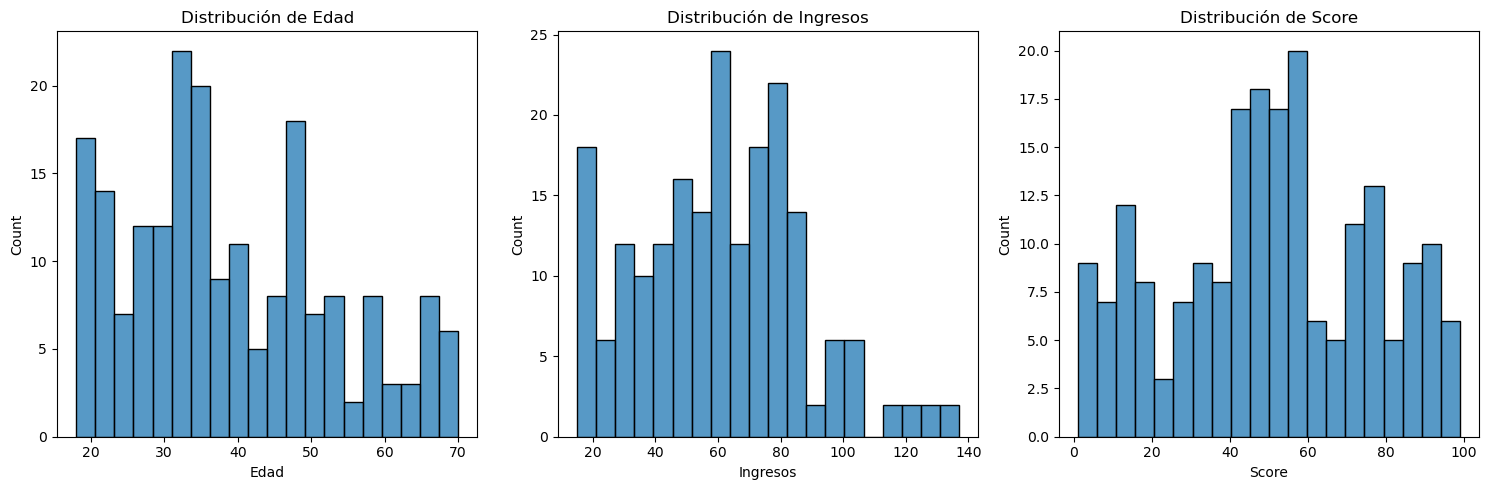

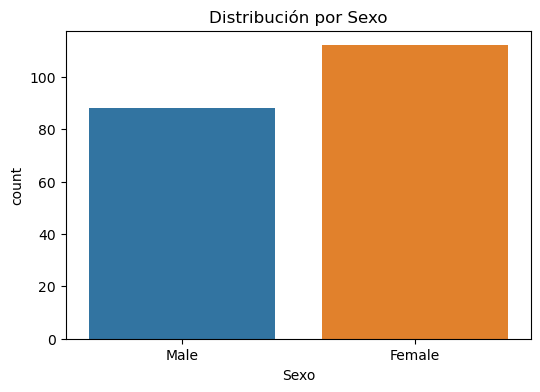

In [7]:
# Configuración de la visualización
plt.figure(figsize=(15, 5))

# Histogramas para variables numéricas
plt.subplot(131)
sns.histplot(data=df, x='Edad', bins=20)
plt.title('Distribución de Edad')

plt.subplot(132)
sns.histplot(data=df, x='Ingresos', bins=20)
plt.title('Distribución de Ingresos')

plt.subplot(133)
sns.histplot(data=df, x='Score', bins=20)
plt.title('Distribución de Score')

plt.tight_layout()
plt.show()

# Visualización de la distribución por Sexo
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sexo')
plt.title('Distribución por Sexo')
plt.show()

Estudio relevante para el objetivo del ejercicio:
1. Análisis del dataset:
    - 200 clientes en total
    - No hay valores nulos, lo que facilita el análisis
    - 5 variables: ID, Sexo, Edad, Ingresos y Score
2. Rangos relevantes para segmentación:
    - Edad: 18-70 años (media 38.85)
    - Ingresos: 15-137 (media 60.56)
    - Score: 1-99 (media 50.20)
3. Aspectos clave para clustering:
    - Amplia dispersión en Score (std: 25.82)
    - Rango significativo de Ingresos (std: 26.26)
    - Variable Sexo es categórica - necesitará encoding

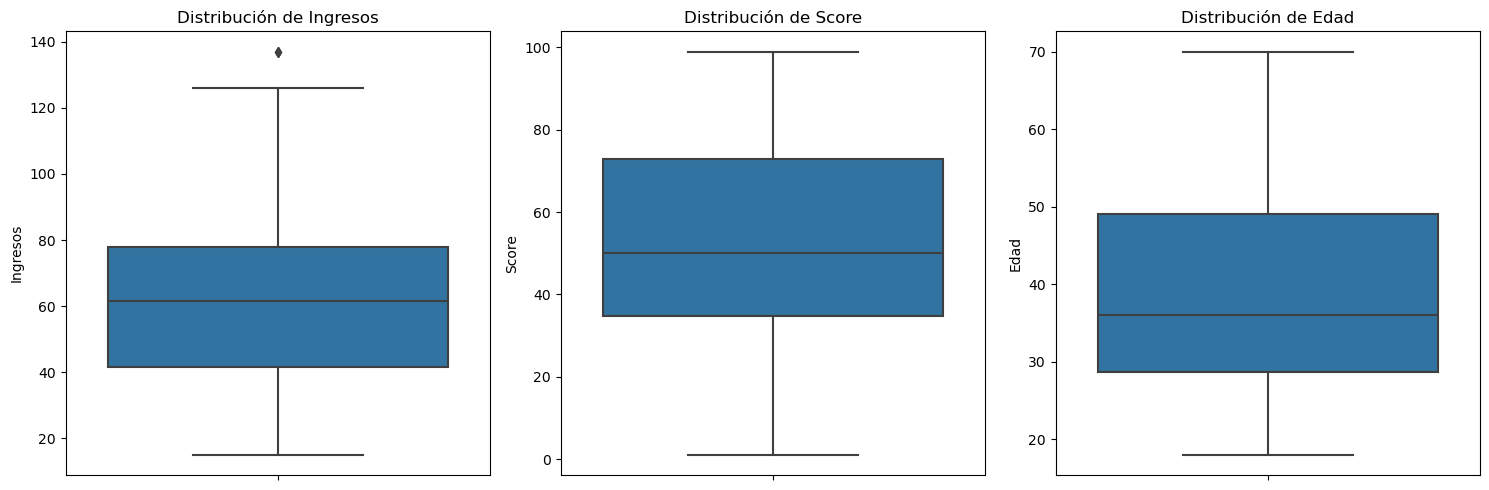

In [19]:
# Análisis de outliers
plt.figure(figsize=(15, 5))

# 1. Box plots para variables numéricas
plt.subplot(131)
sns.boxplot(data=df, y='Ingresos')
plt.title('Distribución de Ingresos')

plt.subplot(132)
sns.boxplot(data=df, y='Score')
plt.title('Distribución de Score')

plt.subplot(133)
sns.boxplot(data=df, y='Edad')
plt.title('Distribución de Edad')

plt.tight_layout()
plt.show()

INGRESOS:
- 50% central: entre 40 y 78 unidades
- Outliers: algunos clientes con ingresos superiores a 125 unidades
- Decisión: Mantenemos los outliers ya que pueden representar un segmento valiosos de clientes premium.

SCORE:
- 50% central: entre 35 y 73 puntos
- Distribución bastante simétrica y sin valores extremos.

EDAD:
- 50% central: entre 30 y 49 años
- Rango total: de 18 a 70 años
- Distribución normal.

## Identificación de patrones
Vamos a crear gráficos para identificar posibles grupos naturales de clientes además de ver relaciones entre
variables como los ingresos y el comportamiento de compra, detectar diferencias por género, ver si la edad influye...

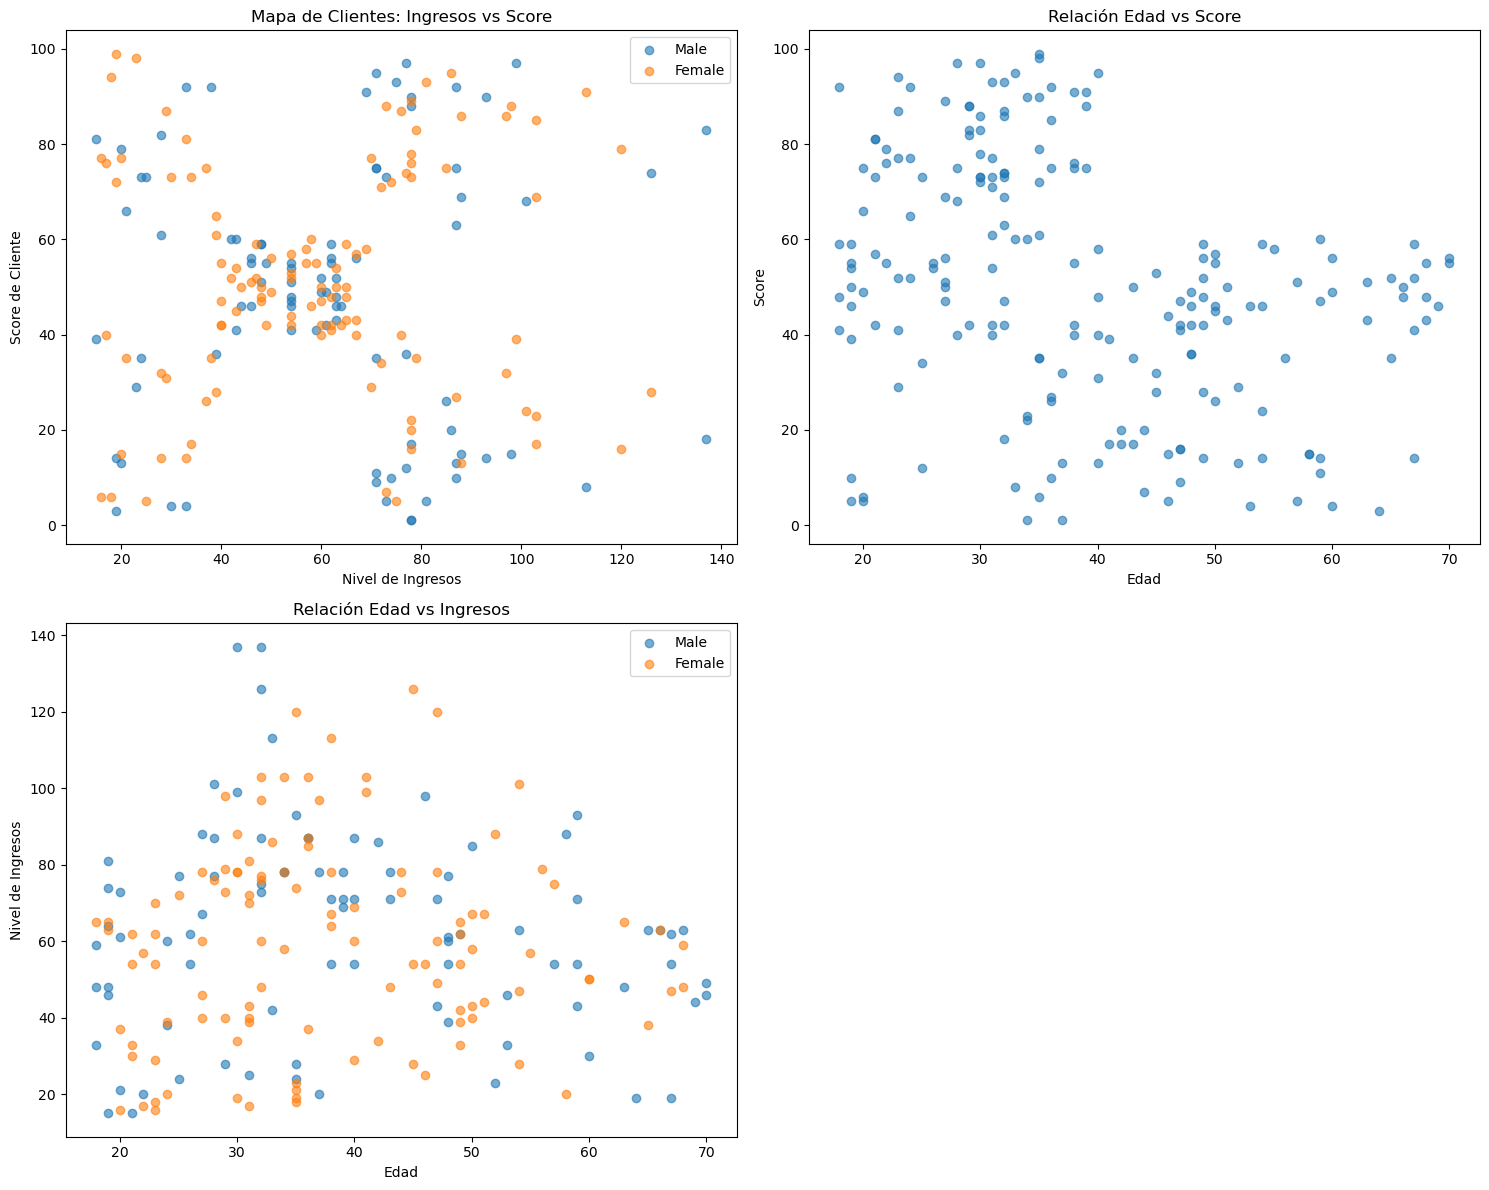

In [21]:
# Visualizaciones para identificar patrones de segmentación
plt.figure(figsize=(15, 12))

# 1. Gráfico principal: Ingresos vs Score por género
plt.subplot(2,2,1)
for sexo in ['Male', 'Female']:
    mask = df['Sexo'] == sexo
    plt.scatter(df[mask]['Ingresos'],
               df[mask]['Score'],
               alpha=0.6,
               label=sexo)
plt.title('Mapa de Clientes: Ingresos vs Score')
plt.xlabel('Nivel de Ingresos')
plt.ylabel('Score de Cliente')
plt.legend()

# 2. Distribución de edades vs score
plt.subplot(2,2,2)
plt.scatter(df['Edad'], df['Score'], alpha=0.6)
plt.title('Relación Edad vs Score')
plt.xlabel('Edad')
plt.ylabel('Score')

# 3. Ingresos vs Edad por género (NUEVO)
plt.subplot(2,2,3)
for sexo in ['Male', 'Female']:
    mask = df['Sexo'] == sexo
    plt.scatter(df[mask]['Edad'],
               df[mask]['Ingresos'],
               alpha=0.6,
               label=sexo)
plt.title('Relación Edad vs Ingresos')
plt.xlabel('Edad')
plt.ylabel('Nivel de Ingresos')
plt.legend()

plt.tight_layout()
plt.show()

Los gráficos de dispersión no muestran patrones claros ni agrupaciones naturales evidentes, lo que sugiere que necesitaremos técnicas de clustering para identificar segmentos de clientes. 

No se observan diferencias significativas por género ni relaciones lineales fuertes entre las variables de Edad, Ingresos y Score.

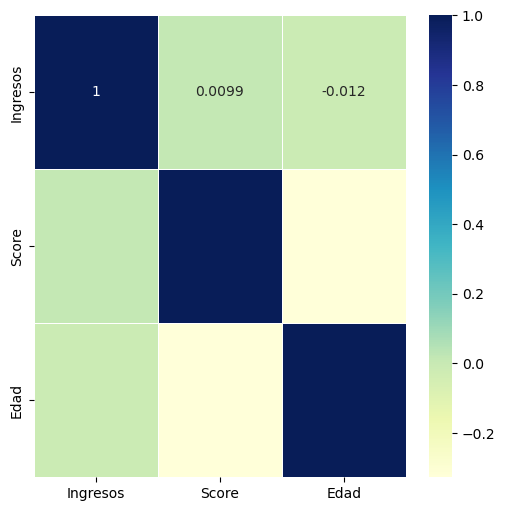

In [23]:
corrs = df[['Ingresos','Score','Edad']].corr() #Heatmap for numetrical columns
fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'YlGnBu');

In [25]:
# Calculamos la matriz de correlación
correlaciones = df[['Ingresos', 'Score', 'Edad']].corr()
print("\nMatriz de correlaciones:")
print(correlaciones)


Matriz de correlaciones:
          Ingresos     Score      Edad
Ingresos  1.000000  0.009903 -0.012398
Score     0.009903  1.000000 -0.327227
Edad     -0.012398 -0.327227  1.000000


Las visualizaciones y el análisis de correlaciones muestran que no existen relaciones lineales fuertes entre las variables (correlaciones < 0.01), ni se observan agrupaciones naturales evidentes en los gráficos de dispersión. 

Esto es normal, cada variable aportará información única y valiosa para identificar los distintos perfiles de clientes para poder desarrollar estrategias personalizadas de marketing.

# Modelo No Supervisado

## Escalado y preparación de datos para clustering
Estandarización de variables numéricas y transformación de variable categórica 
para garantizar que todas las variables tengan el mismo peso en la segmentación.

In [29]:
# Separamos variables para el clustering
X = df[['Edad', 'Ingresos', 'Score', 'Sexo']]

In [31]:
# Encoding de la variable categórica 'Sexo'
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

In [35]:
# Escalado de variables numéricas
scaler = StandardScaler()
columnas_numericas = ['Edad', 'Ingresos', 'Score']
X[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

print("Variables preparadas para clustering:")
print(X.head())

Variables preparadas para clustering:
       Edad  Ingresos     Score  Sexo_Male
0 -1.424569 -1.738999 -0.434801       True
1 -1.281035 -1.738999  1.195704       True
2 -1.352802 -1.700830 -1.715913      False
3 -1.137502 -1.700830  1.040418      False
4 -0.563369 -1.662660 -0.395980      False


## Espacio de soluciones. Buscamos el número óptimo de clusters

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Creación del espacio y listas para guardar la salida

In [39]:
min_k = 2
max_k = 10
soluciones = list(range(min_k, max_k))

In [41]:
codo = []
silueta = []
calins = []
davies = []

### Análisis del espacio

In [43]:
for k in soluciones:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Guardamos las métricas
    codo.append(kmeans.inertia_)
    silueta.append(silhouette_score(X, kmeans.labels_))
    calins.append(calinski_harabasz_score(X, kmeans.labels_))
    davies.append(davies_bouldin_score(X, kmeans.labels_))

Análisis del espacio de soluciones mediante diferentes métricas (Silhouette, Calinski-Harabasz, 
Davies y método del codo) para determinar el número óptimo de clusters que mejor segmente nuestros clientes.

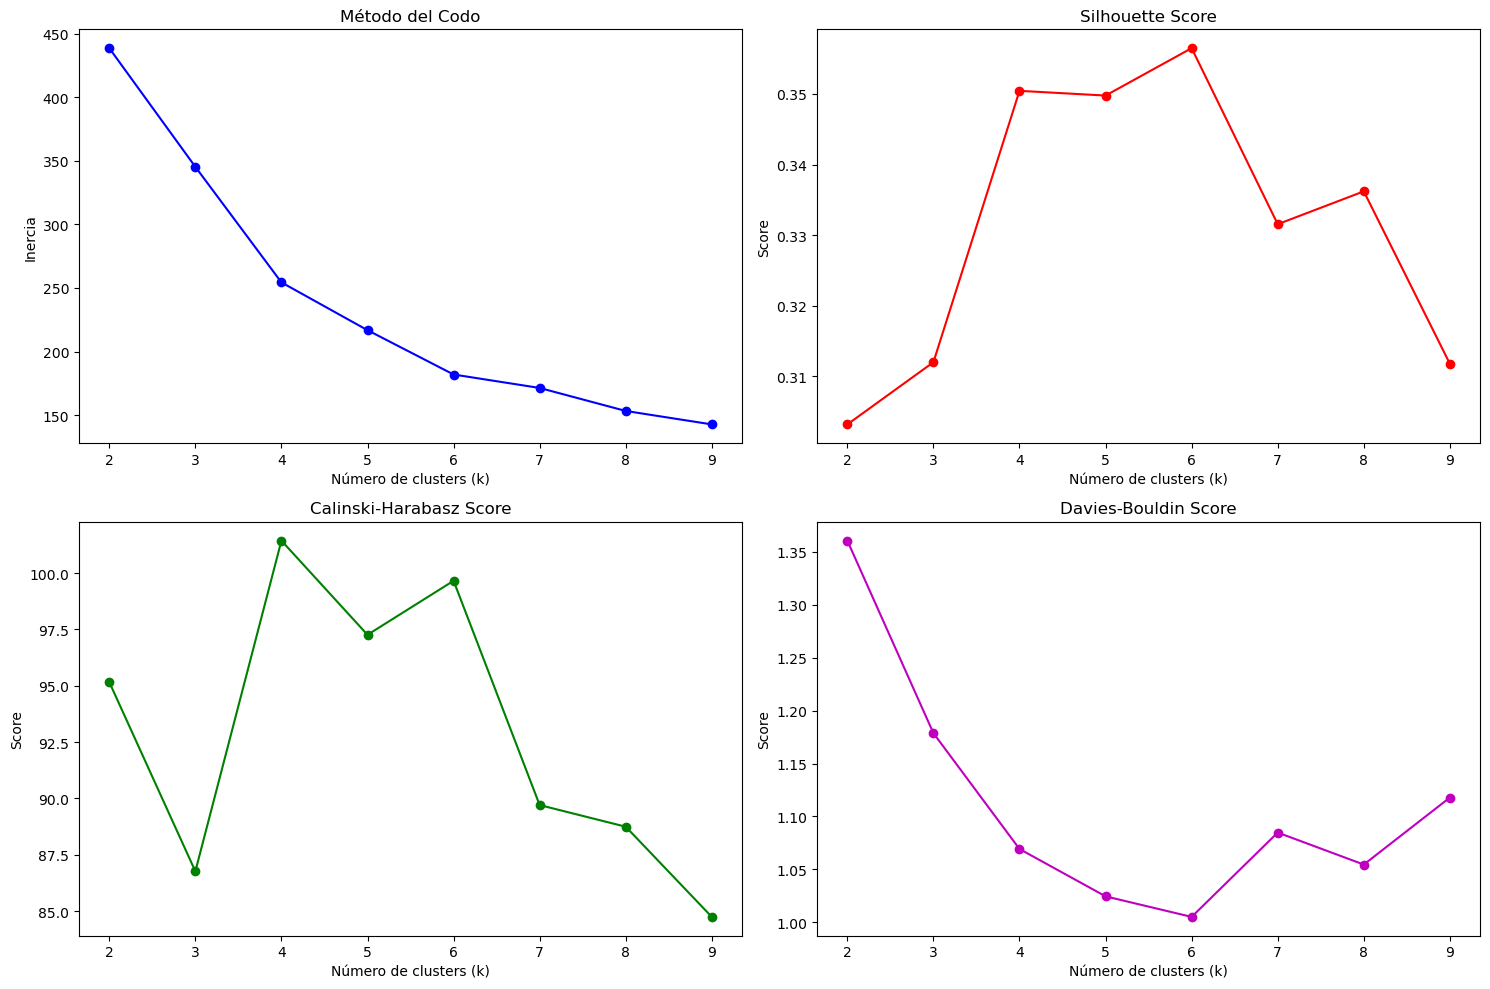

In [45]:
# Visualización de las métricas para elegir el número óptimo de clusters
plt.figure(figsize=(15, 10))

# 1. Método del codo
plt.subplot(2,2,1)
plt.plot(soluciones, codo, 'bo-')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')

# 2. Silhouette Score (mayor es mejor)
plt.subplot(2,2,2)
plt.plot(soluciones, silueta, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score')

# 3. Calinski-Harabasz (mayor es mejor)
plt.subplot(2,2,3)
plt.plot(soluciones, calins, 'go-')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score')

# 4. Davies-Bouldin (menor es mejor)
plt.subplot(2,2,4)
plt.plot(soluciones, davies, 'mo-')
plt.title('Davies-Bouldin Score')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

1. Método del Codo: 
   - El codo se forma entre k=4-5
   - A partir de k=6 el cambio de tendencia es más suave, indicando rendimientos decrecientes

2. Silhouette Score:
   - Alcanza su máximo valor con k=6 (0.36)
   - Indica la mejor separación y cohesión de clusters

3. Calinski-Harabasz:
   - Muestra picos en k=4 y k=6
   - Confirma la validez de estas agrupaciones

4. Davies-Bouldin:
   - Presenta un mínimo en k=6
   - Refuerza la idoneidad de esta segmentación

Seleccionamos **k=6** para el análisis ya que obtiene mejores resultados en diferentes métricas y supone un número manejable de
segmentos.
Este k=6 representa una buena granularidad (grupos ni muy generales ni muy específicos) y significancia (grupos con suficiente número de clientes para ser relevantes)

## Segmentar con el método de k-means con el k elegido

In [47]:
# Aplicamos K-means con k=6
k_optimo = 6
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X)

# Añadimos las etiquetas de cluster al dataframe original
df['Cluster'] = kmeans.labels_

# Vemos cuántos clientes hay en cada cluster
print("Distribución de clientes por cluster:")
print(df['Cluster'].value_counts())

Distribución de clientes por cluster:
Cluster
0    45
1    39
5    38
3    34
4    23
2    21
Name: count, dtype: int64


### PCA
Aunque no necesitamos PCA para el clustering debido al bajo número de variables, sí lo utilizaremos para visualización. 

PCA nos permite representar en 2D la información de todas nuestras variables, facilitando la interpretación visual de los clusters formados.

## Visualización de los clusters

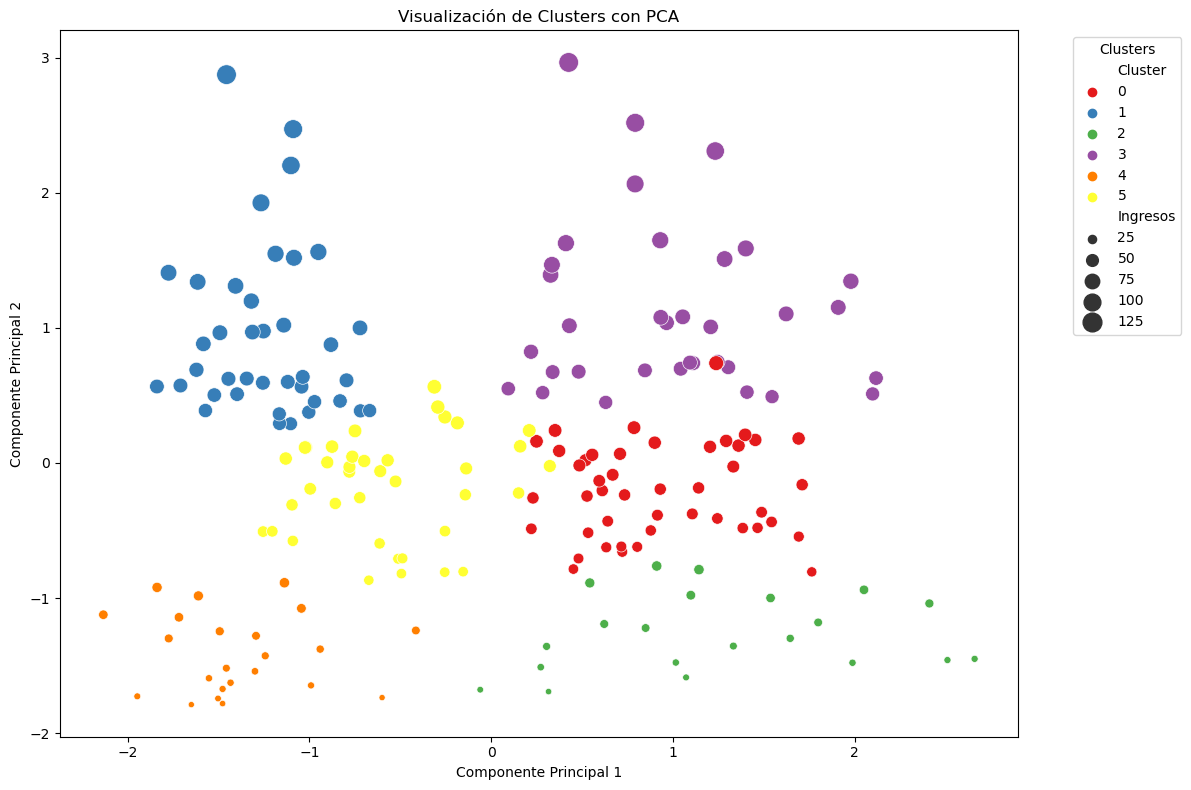

In [55]:
# Visualización de clusters mediante PCA
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']
pca_df['Ingresos'] = df['Ingresos']

# Visualizar
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', 
                size='Ingresos', sizes=(20, 200), palette='Set1')
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Análisis preliminar de clusters mediante PCA

La visualización PCA nos permite identificar claramente 6 clusters distintos, confirmando nuestra elección de k=6. Para obtener insights accionables, necesitamos analizar las características reales de cada grupo en términos de las variables originales.


El tamaño de los puntos representa el nivel de ingresos, lo que nos permite observar que algunos clusters tienden a agrupar clientes con niveles de ingresos similares. Esta visualización confirma que nuestro modelo ha identificado patrones significativos en los datos, agrupando clientes con características similares.

A continuación, examinaremos las estadísticas descriptivas de cada cluster para crear perfiles de cliente significativos que puedan informar nuestras estrategias de marketing.

In [53]:
# Información sobre la varianza explicada
print(f"Varianza explicada por los componentes principales:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {sum(pca.explained_variance_ratio_):.2%}")

Varianza explicada por los componentes principales:
PC1: 40.95%
PC2: 30.82%
Total: 71.77%


Los dos componentes principales explican el 71.77% de la varianza total (PC1: 40.95% + PC2: 30.82%). 
La varianza explicada indica qué porcentaje de la información original de nuestras variables es capturada por cada c
omponente principal. Al superar el 70%, podemos confiar en que esta  visualización bidimensional representa adecuadamente la estructura de nuestros datos, permitiéndonos interpretar con confianza los clusters formados.

# Perfil de los segmentos
Vamos a identificar las características distintivas de cada segmento de clientes para crear los perfiles y desarrollar estrategias de marketing personalizadas.

In [59]:
# Añadir la asignación de clusters al dataframe original
df['Cluster'] = kmeans.labels_

# Analizar estadísticas por cluster
cluster_stats = df.groupby('Cluster').agg({
    'Edad': ['mean', 'min', 'max'],
    'Ingresos': ['mean', 'min', 'max'],
    'Score': ['mean', 'min', 'max']
}).round(2)

# Distribución de género por cluster
gender_distribution = pd.crosstab(df['Cluster'], df['Sexo'], normalize='index') * 100

# Mostrar resultados
print("Estadísticas por cluster:")
display(cluster_stats)
print("\nDistribución de género por cluster (%):")
display(gender_distribution.round(2))

Estadísticas por cluster:


Edad         Ingresos           Score        
          mean min max     mean min  max   mean min max
Cluster                                                
0        56.33  43  70    54.27  38   79  49.07  35  60
1        32.69  27  40    86.54  69  137  82.13  63  97
2        45.52  20  67    26.29  16   39  19.38   3  40
3        41.26  19  59    88.50  71  137  16.76   1  39
4        25.00  18  35    25.26  15   39  77.61  39  99
5        27.00  18  40    56.66  39   76  49.13  29  61


Distribución de género por cluster (%):


Sexo,Female,Male
Cluster,,
0,57.78,42.22
1,53.85,46.15
2,61.90,38.10
3,41.18,58.82
4,56.52,43.48
5,65.79,34.21


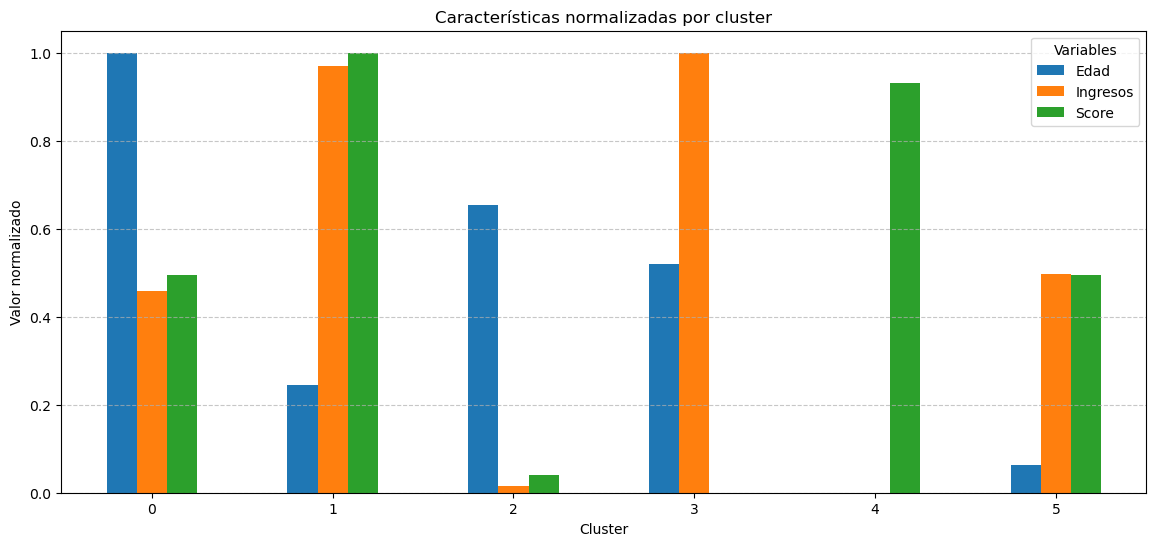

In [61]:
# Visualizar las características de cada cluster con un gráfico de barras
plt.figure(figsize=(14, 6))

# Valores medios normalizados para comparación
means = df.groupby('Cluster')[['Edad', 'Ingresos', 'Score']].mean()
means_normalized = (means - means.min()) / (means.max() - means.min())

# Graficar
means_normalized.plot(kind='bar', ax=plt.gca())
plt.title('Características normalizadas por cluster')
plt.ylabel('Valor normalizado')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Cluster 0: "Seniors Moderados"
- **Edad**: Media de 56.33 años (43-70), el segmento de mayor edad
- **Ingresos**: Nivel medio (54.27 en promedio)
- **Score**: Moderado (49.07 en promedio)
- **Género**: Distribución equilibrada con ligera mayoría femenina (57.78%)
- **Descripción**: Clientes de mayor edad con ingresos medios y comportamiento de compra moderado.
- **Estrategia recomendada**: Productos y comunicación adaptados a un público maduro, con énfasis en relación calidad/precio y servicio postventa.

## Cluster 1: "Premium"
- **Edad**: Adultos de mediana edad (32.69 años en promedio)
- **Ingresos**: Los más altos (86.54 en promedio, hasta 137)
- **Score**: El más alto (82.13 en promedio)
- **Género**: Distribución equilibrada (53.85% mujeres, 46.15% hombres)
- **Descripción**: Segmento de alto valor con gran capacidad de compra y el mejor comportamiento de compra de todos los grupos.
- **Estrategia recomendada**: Trato preferencial, productos exclusivos y servicios personalizados para mantener su alto nivel de gasto.

## Cluster 2: "Bajo Consumo"
- **Edad**: Adultos (45.52 años en promedio)
- **Ingresos**: Bajos (26.29 en promedio)
- **Score**: Muy bajo (19.38 en promedio)
- **Género**: Mayoría femenina (61.90%)
- **Descripción**: Clientes con limitada capacidad de compra y bajo nivel de gasto en la empresa.
- **Estrategia recomendada**: Ofertas especiales y productos básicos asequibles que puedan ajustarse a su capacidad económica.

## Cluster 3: "Alto Ingreso - Bajo Consumo"
- **Edad**: Adultos (41.26 años en promedio)
- **Ingresos**: Muy altos (88.50 en promedio, hasta 137)
- **Score**: Muy bajo (16.76 en promedio)
- **Género**: Mayoría masculina (58.82%)
- **Descripción**: Clientes con gran capacidad económica pero bajo nivel de compra en la empresa. Representan una oportunidad de crecimiento.
- **Estrategia recomendada**: Desarrollar estrategias para aumentar su gasto como implementación de programas de fidelización con beneficios exclusivos para este segmento.

## Cluster 4: "Jóvenes Comprometidos"
- **Edad**: Los más jóvenes (25.00 años en promedio)
- **Ingresos**: Bajos (25.26 en promedio)
- **Score**: Muy alto (77.61 en promedio)
- **Género**: Mayoría femenina (66.52%)
- **Descripción**: Jóvenes con recursos limitados pero excelente comportamiento de compra, destinando una proporción significativa de sus ingresos a la empresa.
- **Estrategia recomendada**: Productos asequibles pero atractivos, marketing en canales digitales y programas de recompensa para premiar su lealtad.

## Cluster 5: "Jóvenes Profesionales"
- **Edad**: Jóvenes (27.00 años en promedio)
- **Ingresos**: Medios-altos (56.66 en promedio)
- **Score**: Medio (49.13 en promedio)
- **Género**: Clara mayoría femenina (65.79%)
- **Descripción**: Jóvenes con buenos ingresos y comportamiento de compra moderado.
- **Estrategia recomendada**: Productos de calidad media-alta y comunicación enfocada a su estilo de vida.Es

## Calificativo por perfil

- 0: "Seniors Moderados"
- 1: "Premium"
- 2: "Bajo Consumo"
- 3: "Alto Ingreso - Bajo Consumo"
- 4: "Jóvenes Comprometidos"
- 5: "Jóvenes Profesionales"

# DBSCAN

## **Buscamos la distancia (epsilon)

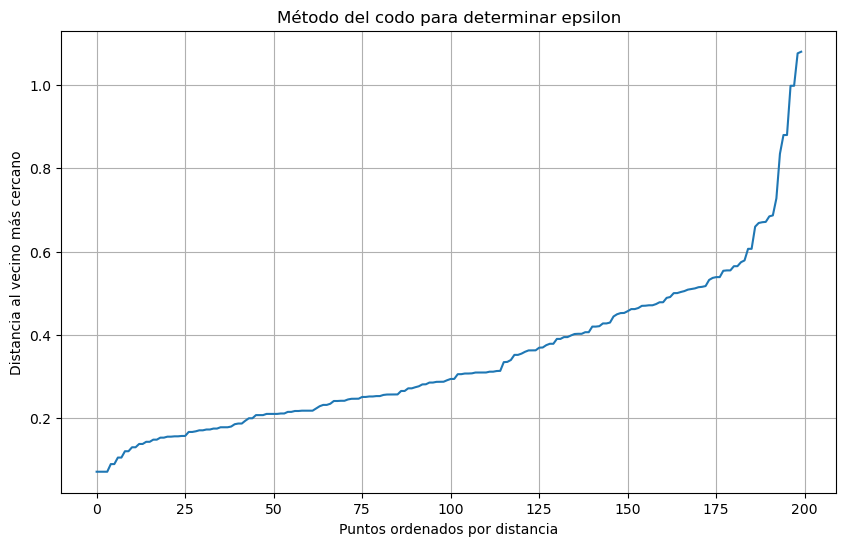

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Usamos los datos normalizados que ya teníamos para K-means
X_scaled = X  # Usamos la misma matriz normalizada que usamos para K-means

# Encontrar el valor óptimo de epsilon (distancia)
# Calculamos las distancias entre puntos
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenamos las distancias para el gráfico del codo
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Visualizamos para encontrar el "codo"
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Método del codo para determinar epsilon')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.grid(True)
plt.show()

## **DBSCAN (epsilon)
Basándonos en el gráfico, elegimos como valor de epsilon 0.6 (radio de vecindad), valor donde se observa un cambio de pendiente más pronunciada.

In [79]:
epsilon = 0.6  # Valor donde se observa un cambio en la pendiente
min_samples = 5  # Número mínimo de muestras en un cluster

# Aplicamos DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Añadimos las etiquetas al dataframe
df['DBSCAN_Cluster'] = clusters

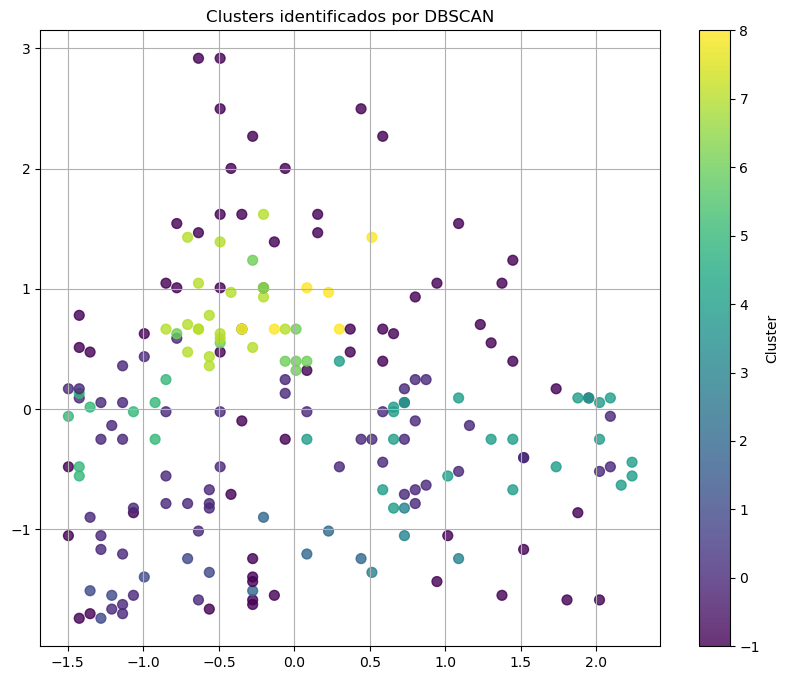

Distribución de puntos por cluster:
-1    62
 0    57
 1     6
 2     5
 3     4
 4    22
 5     9
 6    10
 7    18
 8     7
Name: count, dtype: int64
Número de puntos clasificados como ruido: 62


In [81]:
# Visualizamos los resultados
plt.figure(figsize=(10, 8))

if isinstance(X_scaled, pd.DataFrame):
    X_array = X_scaled.values
else:
    X_array = X_scaled

# Usar las primeras dos componentes principales para la visualización
plt.scatter(X_array[:, 0], X_array[:, 1], c=clusters, cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title('Clusters identificados por DBSCAN')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Contamos cuántos puntos hay en cada cluster
print("Distribución de puntos por cluster:")
print(pd.Series(clusters).value_counts().sort_index())

# Analizamos los clusters (excluyendo ruido, que es -1)
if -1 in clusters:
    print(f"Número de puntos clasificados como ruido: {list(clusters).count(-1)}")

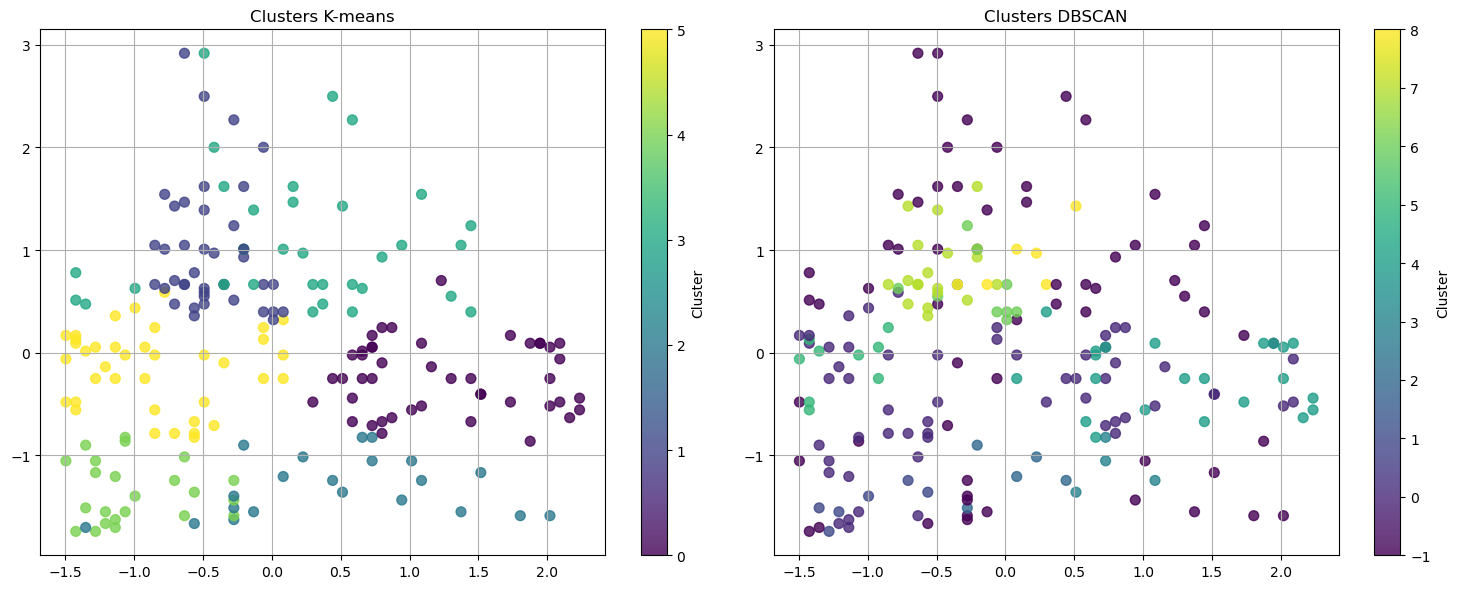

In [83]:
# Comparamos visualmente K-means y DBSCAN
plt.figure(figsize=(15, 6))

# K-means
plt.subplot(1, 2, 1)
plt.scatter(X_array[:, 0], X_array[:, 1], c=df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title('Clusters K-means')
plt.colorbar(label='Cluster')
plt.grid(True)

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_array[:, 0], X_array[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o', s=50, alpha=0.8)
plt.title('Clusters DBSCAN')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()

## Comparación de estadísticas básicas
print("Comparación de modelos:")
print(f"K-means: {len(df['Cluster'].unique())} clusters")
print(f"DBSCAN: {len([x for x in df['DBSCAN_Cluster'].unique() if x >= 0])} clusters + puntos de ruido")
print(f"Puntos clasificados como ruido en DBSCAN: {sum(df['DBSCAN_Cluster'] == -1)}")

## Tabla de contingencia para ver cómo se relacionan los clusters de ambos métodos
contingency = pd.crosstab(df['Cluster'], df['DBSCAN_Cluster'])
print("\nRelación entre clusters de K-means y DBSCAN:")
display(contingency)

## Comparación entre K-means y DBSCAN

Al comparar ambos métodos de clustering, observamos diferencias significativas:

### K-means:
- Generó 6 clusters bien definidos
- Asignó todos los clientes a algún cluster
- Proporcionó segmentos claros y accionables para estrategias de marketing
- Los perfiles de cliente son fáciles de interpretar y comunicar

### DBSCAN:
- Identificó 9 clusters de tamaños muy variables
- Clasificó 62 clientes (31%) como "ruido" u outliers
- Reveló micro-segmentos que podrían representar nichos específicos
- Ofrece una visión más granular, es decir, grupos más pequeños y mayor detalle

# Conclusión y recomendaciones

Para los objetivos de segmentación de clientes y desarrollo de estrategias de marketing, recomendamos:

1. **Utilizar principalmente la segmentación de K-means** para las estrategias generales de marketing, ya que proporciona grupos más equilibrados y accionables.

2. **Aprovechar los insights de DBSCAN** para:
   - Identificar clientes atípicos que podrían requerir atención especial
   - Explorar posibles nichos de mercado representados por los clusters pequeños
   - Complementar las estrategias generales con enfoques específicos para estos casos

Esta combinación de métodos nos permite balancear la necesidad de estrategias accionables con la identificación de patrones con más detalle en el comportamiento de los clientes.

# Resumen del procesoy guía de pasos seguidos

1. **Importar las librerías**
   - Preparación del entorno de trabajo con las herramientas necesarias

2. **Importar el data set**
   - Carga de datos para su análisis

3. **EDA**
   - 3.1. Análisis inicial de datos: Estadísticas descriptivas y estructura
   - 3.2. Identificación de patrones: Visualización de distribuciones y relaciones

4. **Modelo No Supervisado**
   - 4.1. Escalado y preparación de datos para clustering
   - 4.2. Espacio de soluciones: Búsqueda del número óptimo de clusters
     - 4.2.1. Creación del espacio y listas para guardar la salida
     - 4.2.2. Análisis del espacio
   - 4.3. Segmentar con el método de k-means con el k elegido
     - 4.3.1. PCA: Reducción de dimensionalidad para visualización
   - 4.4. Visualización de los clusters: Representación gráfica de segmentos

5. **Análisis preliminar de clusters mediante PCA**
   - Interpretación de componentes principales y varianza explicada

6. **Perfil de los segmentos**
   - 6.1. Cluster 0: "Seniors Moderados"
   - 6.2. Cluster 1: "Premium"
   - 6.3. Cluster 2: "Bajo Consumo"
   - 6.4. Cluster 3: "Alto Ingreso - Bajo Consumo"
   - 6.5. Cluster 4: "Jóvenes Comprometidos"
   - 6.6. Cluster 5: "Jóvenes Profesionales"
   - 6.7. Calificativo por perfil: Resumen de nombres asignados

7. **DBSCAN**
   - 7.1. Búsqueda de la distancia (epsilon): Método del codo
   - 7.2. DBSCAN (epsilon): Aplicación del algoritmo con parámetros optimizados
   - 7.3. Comparación de estadísticas básicas: Métricas de ambos métodos
   - 7.4. Tabla de contingencia: Relación entre clusters de ambos métodos
   - 7.5. Comparación entre K-means y DBSCAN
     - 7.5.1. K-means: Características y ventajas
     - 7.5.2. DBSCAN: Características y ventajas

8. **Conclusión y recomendaciones**
   - Evaluación final de resultados y propuesta de estrategia híbrida